In [110]:
import numpy as np 
from matplotlib import pyplot as plt
import random

0.9999605221019081
0.008885619712734764


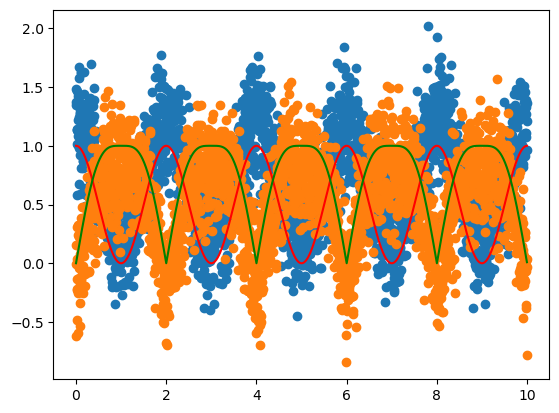

In [111]:
# Generate random accelerometer noisy sensor data
sweep_time = 10
hz = 250
rang = sweep_time * hz
time_axis = np.arange(rang)/hz
time = np.arange(rang) 

y_accelerometer = (1/2 * np.cos(time*np.pi/(hz))) + 0.5 # True values
print(y_accelerometer[-1])
y_accelerometer_noisy = y_accelerometer + np.random.randn(rang)/2 + 0.2 # Y-axis Noisy sampples

z_accelerometer = np.sqrt(1 - y_accelerometer**2)# True values
print(z_accelerometer[-1])
z_accelerometer_noisy = z_accelerometer + np.random.randn(rang)/2 - 0.2# Z-axis Noisy samples

# generate random acceleration 
plt.plot(time_axis,y_accelerometer,'r')
plt.plot(time_axis,z_accelerometer,'g')
plt.scatter(time_axis,y_accelerometer_noisy)
plt.scatter(time_axis,z_accelerometer_noisy)

[-9.00000000e+01  8.88561971e-03  8.88474277e-03 ... -8.88035888e-03
 -8.88298904e-03 -8.88474277e-03]


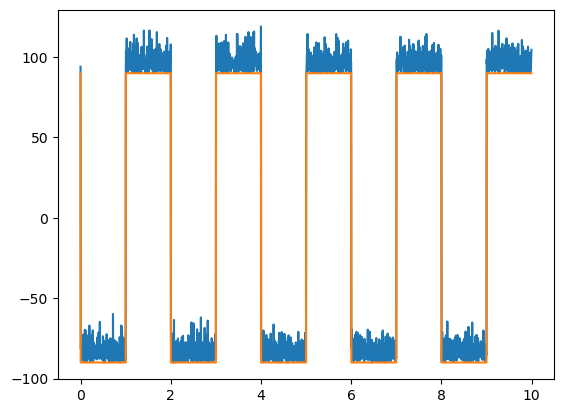

In [112]:
# generate gyroscopic data with and without noise

deriv = np.append(np.array([-90]),np.diff(z_accelerometer))
print(deriv)
gx = -np.heaviside(deriv,0)*180 + 90


gx_noisy = gx + max(gx) * abs(np.random.randn(rang)*0.1)# rotational noisy data

plt.plot(time_axis,gx_noisy)
plt.plot(time_axis,gx)



89.49747681569731


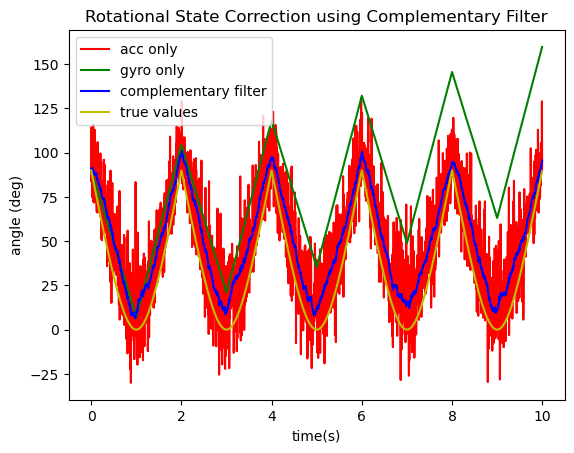

In [113]:
# define parameters and initial values:

dt = 1/hz
theta_0 = 0

# calculate roll and pitch from both the acceleration and gyroscopic data
accAngleX = np.arctan2(y_accelerometer_noisy,z_accelerometer_noisy) * 57.3
accAngleY = np.arctan2(0,np.sqrt(np.sqrt(np.square(y_accelerometer_noisy) + np.square(z_accelerometer_noisy)))) * 57.3
gyr_sum = np.zeros(rang)

roll_est= np.zeros(rang)

for i in range(rang):
    if i == 0:
        gyr_sum[i] = 90
        roll_est[i] = 90
        pass
    else:
        accel_contrib = accAngleX[i] * 0.04
        gyr_sum[i] = gyr_sum[i-1] + gx_noisy[i]*dt
        roll_est[i] = 0.96 * (gx_noisy[i-1] * dt + roll_est[i-1]) + accel_contrib


roll_actual = np.arctan2(y_accelerometer,z_accelerometer) * 57.3



plt.plot(time_axis,accAngleX,'r') # only accelerometer
plt.plot(time_axis,gyr_sum, 'g') # only gyro
plt.plot(time_axis,roll_est,'b') # complementary filter
plt.plot(time_axis,roll_actual,'y')


plt.legend(['acc only', 'gyro only','complementary filter','true values'])
plt.xlabel('time(s)')
plt.ylabel('angle (deg)')
plt.title("Rotational State Correction using Complementary Filter")

print(roll_actual[-1])